<a href="https://colab.research.google.com/github/ayaayoubi/semantic-search/blob/main/Copy_of_clinical_distilbert_i2b2_2010_(8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers

## Local Inference on GPU
Model page: https://huggingface.co/nlpie/clinical-distilbert-i2b2-2010

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/nlpie/clinical-distilbert-i2b2-2010)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("token-classification", model="nlpie/clinical-distilbert-i2b2-2010")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [3]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("nlpie/clinical-distilbert-i2b2-2010")
model = AutoModelForTokenClassification.from_pretrained("nlpie/clinical-distilbert-i2b2-2010")

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('metadata.csv')

# Display the first few rows of the dataset to verify it's loaded correctly
df.head()


,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [5]:


# Remove rows where clinical_notes is NaN or empty or only spaces
df = df[df['clinical_notes'].notna()]  # drop NaNs first
df = df[df['clinical_notes'].str.strip() != ""]  # drop empty or whitespace-only strings

df = df.reset_index(drop=True)  # reset index after dropping
print(f"Rows remaining after cleaning: {len(df)}")





Rows remaining after cleaning: 768


In [6]:
print(df['clinical_notes'])


0      On January 22, 2020, a 65-year-old man with a ...
1      On January 22, 2020, a 65-year-old man with a ...
2      On January 22, 2020, a 65-year-old man with a ...
3      On January 22, 2020, a 65-year-old man with a ...
4       diffuse infiltrates in the bilateral lower lungs
                             ...                        
763    Asthmatic. Shortness of breath and wheeze. Rou...
764    Asthmatic. Shortness of breath and wheeze. The...
765    fire-eater accidentally ingested a paraffin mi...
766    The patient, a heavy smoker, was referred to t...
767    The patient, a heavy smoker, was referred to t...
Name: clinical_notes, Length: 768, dtype: object


In [7]:
from transformers import pipeline

# Load the pre-trained model for NER
pipe = pipeline("token-classification", model="nlpie/clinical-distilbert-i2b2-2010")

# Function to extract clinical entities
def extract_entities(text):
    entities = pipe(text)
    return [(entity['word'], entity['entity'], entity['score']) for entity in entities]

# Apply the function to the "clinical_notes" column
df['extracted_entities'] = df['clinical_notes'].apply(lambda x: extract_entities(x) if isinstance(x, str) else [])

# Show the updated dataframe with extracted entities
df[['clinical_notes', 'extracted_entities']]


Device set to use cpu


,clinical_notes,extracted_entities
0,"On January 22, 2020, a 65-year-old man with a ...","[(h, B-problem, 0.99911076), (##yper, B-proble..."
1,"On January 22, 2020, a 65-year-old man with a ...","[(h, B-problem, 0.99907076), (##yper, B-proble..."
2,"On January 22, 2020, a 65-year-old man with a ...","[(h, B-problem, 0.99907076), (##yper, B-proble..."
3,"On January 22, 2020, a 65-year-old man with a ...","[(h, B-problem, 0.99911934), (##yper, B-proble..."
4,diffuse infiltrates in the bilateral lower lungs,"[(di, B-problem, 0.9980544), (##ff, B-problem,..."
...,...,...
763,Asthmatic. Shortness of breath and wheeze. Rou...,"[(As, B-problem, 0.97912824), (##th, B-problem..."
764,Asthmatic. Shortness of breath and wheeze. The...,"[(As, B-problem, 0.9844806), (##th, B-problem,..."
765,fire-eater accidentally ingested a paraffin mi...,"[(a, B-treatment, 0.8758664), (para, I-treatme..."
766,"The patient, a heavy smoker, was referred to t...","[(routine, B-test, 0.9878526), (chest, I-test,..."


In [8]:
from transformers import pipeline
import pandas as pd

# Load your dataset (replace the path with your actual file)
# For example, if your data is in a CSV file:
df = pd.read_csv("metadata.csv")  # <-- Replace with your file path
# Remove rows where clinical_notes is NaN or empty or only spaces
df = df[df['clinical_notes'].notna()]  # drop NaNs first
df = df[df['clinical_notes'].str.strip() != ""]  # drop empty or whitespace-only strings

df = df.reset_index(drop=True)  # reset index after dropping
# Load the NER pipeline
model_name = "nlpie/clinical-distilbert-i2b2-2010"
nlp_ner = pipeline("token-classification", model=model_name)

# Function to extract and merge entities from clinical notes
def extract_and_merge_entities(text):
    if not isinstance(text, str):
        return []

    raw_entities = nlp_ner(text)

    merged = []
    current_text = ""
    current_label = ""

    for ent in raw_entities:
        word = ent["word"]
        label = ent["entity"]

        # Remove '##' from subword tokens and concatenate without space
        if word.startswith("##"):
            word = word[2:]
            current_text += word
        # If label is I- and matches current entity label, add with space
        elif label.startswith("I-") and label[2:] == current_label:
            current_text += " " + word
        else:
            # Save previous entity if exists
            if current_text:
                merged.append((current_text, current_label))
            # Start new entity
            current_text = word
            current_label = label[2:] if label.startswith("B-") else label

    # Append the last entity if any
    if current_text:
        merged.append((current_text, current_label))

    return merged

# Apply the extraction function to the 'clinical_notes' column
df['extracted_entities'] = df['clinical_notes'].apply(extract_and_merge_entities)

# Display some results
print(df[['clinical_notes', 'extracted_entities']])


Device set to use cpu


                                        clinical_notes  \
0    On January 22, 2020, a 65-year-old man with a ...   
1    On January 22, 2020, a 65-year-old man with a ...   
2    On January 22, 2020, a 65-year-old man with a ...   
3    On January 22, 2020, a 65-year-old man with a ...   
4     diffuse infiltrates in the bilateral lower lungs   
..                                                 ...   
763  Asthmatic. Shortness of breath and wheeze. Rou...   
764  Asthmatic. Shortness of breath and wheeze. The...   
765  fire-eater accidentally ingested a paraffin mi...   
766  The patient, a heavy smoker, was referred to t...   
767  The patient, a heavy smoker, was referred to t...   

                                    extracted_entities  
0    [(hypertension, problem), (type 2 diabetes, pr...  
1    [(hypertension, problem), (type 2 diabetes, pr...  
2    [(hypertension, problem), (type 2 diabetes, pr...  
3    [(hypertension, problem), (type 2 diabetes, pr...  
4    [(diffuse inf

In [9]:
def separate_entities(entity_list):
    problems = []
    tests = []
    treatments = []

    for text, label in entity_list:
        label = label.lower()
        if label == "problem":
            problems.append(text)
        elif label == "test":
            tests.append(text)
        elif label == "treatment" or label == "i-treatment":  # catch variations
            treatments.append(text)
    return pd.Series([problems, tests, treatments])

# Assuming your dataframe is called df and the column is 'extracted_entities'
df[['problems', 'tests', 'treatments']] = df['extracted_entities'].apply(separate_entities)

# Now check the new columns
print(df[['problems', 'tests', 'treatments']].head())

                                            problems  \
0  [hypertension, type 2 diabetes, coronary heart...   
1  [hypertension, type 2 diabetes, coronary heart...   
2  [hypertension, type 2 diabetes, coronary heart...   
3  [hypertension, type 2 diabetes, coronary heart...   
4  [diffuse infiltrates in the bilateral lower lu...   

                                          tests  \
0                           [Chest radiographs]   
1  [The partial pressure of, chest radiographs]   
2  [The partial pressure of, chest radiographs]   
3                                            []   
4                                            []   

                                          treatments  
0                                          [a stent]  
1  [a stent, supplemental oxygen, a nasal cannula...  
2  [a stent, supplemental oxygen, a nasal cannula...  
3                                          [a stent]  
4                                                 []  


In [10]:
def combine_entities(row):
    # Combine lists of problems, tests, and treatments into one string separated by commas
    combined = []
    for col in ['problems', 'tests', 'treatments']:
        # join items in the list with commas, skip if empty
        if row[col]:
            combined.append(", ".join(row[col]))
    return " | ".join(combined)  # Use ' | ' to separate entity types


In [11]:
df['combined_entities'] = df.apply(combine_entities, axis=1)


In [12]:
from sentence_transformers import SentenceTransformer

# Load SAPBERT model
model = SentenceTransformer('cambridgeltl/SapBERT-from-PubMedBERT-fulltext')




# Generate embeddings for the combined entities
embeddings = model.encode(df['combined_entities'].tolist(), show_progress_bar=True)

# embeddings is now a numpy array, where each row corresponds to one clinical note


config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


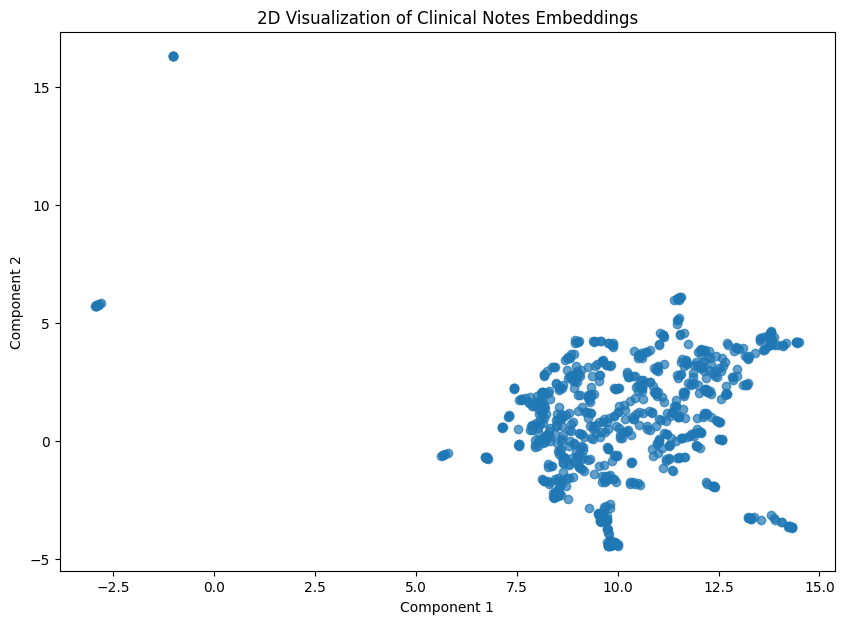

In [13]:
# If you haven't installed these libraries yet:
!pip install -q matplotlib scikit-learn umap-learn

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap  # the package is called umap-learn

# Suppose embeddings is your numpy array of shape (num_samples, embedding_dim)

# Choose method: uncomment one

# 1. t-SNE
#tsne = TSNE(n_components=2, random_state=42)
#emb_2d = tsne.fit_transform(embeddings)

# OR

# 2. UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
emb_2d = reducer.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.7)
plt.title("2D Visualization of Clinical Notes Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)  # embeddings is your original vector, not the 2D one


In [15]:
df['cluster'] = cluster_labels


In [16]:
import pandas as pd
from collections import Counter

# Assuming you already have df and cluster_labels
df['cluster'] = cluster_labels

# Analyze each cluster
for c in range(2):
    print(f"=== Cluster {c} ===")

    # Get problems
    problems_all = sum(df[df['cluster'] == c]['problems'], [])  # flatten
    top_problems = Counter(problems_all).most_common(10)
    print("Top problems:", top_problems)

    # Get tests
    tests_all = sum(df[df['cluster'] == c]['tests'], [])  # flatten
    top_tests = Counter(tests_all).most_common(10)
    print("Top tests:", top_tests)

    # Get treatments
    treatments_all = sum(df[df['cluster'] == c]['treatments'], [])  # flatten
    top_treatments = Counter(treatments_all).most_common(10)
    print("Top treatments:", top_treatments)

    print()



=== Cluster 0 ===
Top problems: [('fever', 225), ('-', 215), ('cough', 124), ('COVID', 81), ('dry cough', 70), ('dyspnea', 47), ('dyspnoea', 47), ('shortness of breath', 42), ('symptoms', 36), ('pleural effusion', 36)]
Top tests: [('-', 62), ('PCR', 38), ('Chest radiograph', 24), ('Chest X - ray', 24), ('Laboratory studies', 22), ('SpO2', 21), ('CXR', 19), ('C', 19), ('CT', 18), ('a', 18)]
Top treatments: [('treatment', 31), ('-', 25), ('antibiotics', 22), ('mechanical ventilation', 22), ('intubation', 13), ('ritonavir', 13), ('lopinavir', 12), ('(', 11), ('antiretroviral therapy', 10), ('chemotherapy', 8)]

=== Cluster 1 ===
Top problems: [('-', 29), ('pleural effusion', 11), ('COVID', 11), ('ground', 10), ('the radiological findings', 8), ('pneumonia', 7), ('19 pneumonia', 7), ('Shortness of breath', 7), ('consolidations', 6), ('symptoms', 5)]
Top tests: [('Anteroposterior radiograph', 13), ('CT images', 10), ('CT', 8), ('Chest X - ray', 8), ('high', 5), ('- resolution computed tomog

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


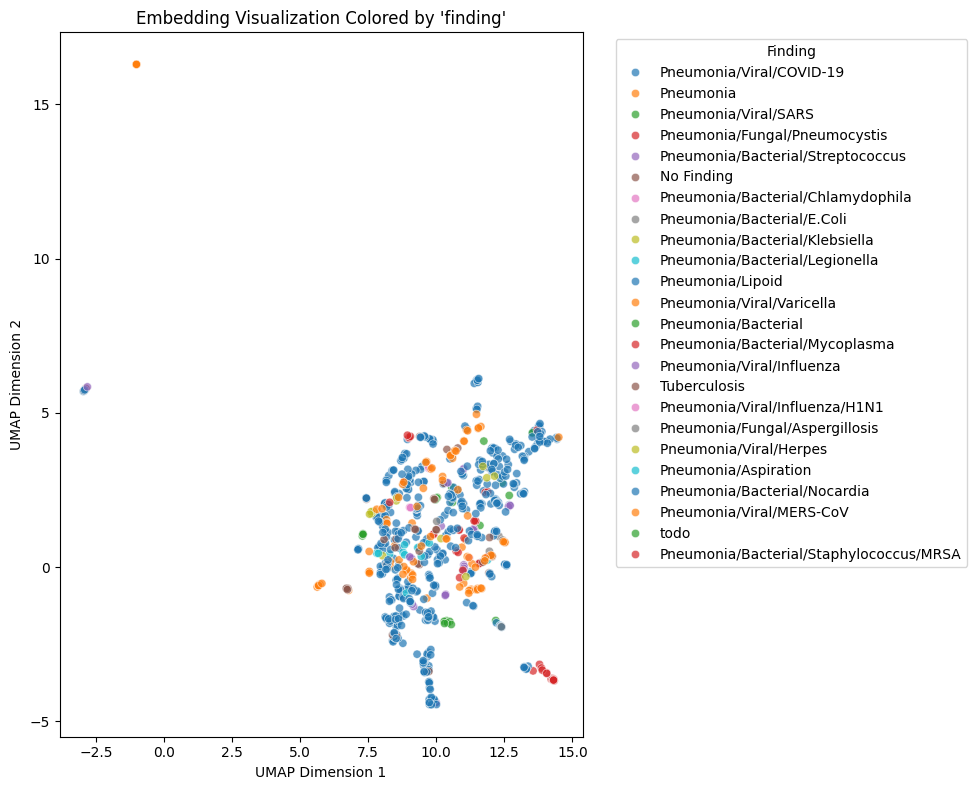

In [17]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your embeddings are in a numpy array or DataFrame 'embeddings'
# and 'df' is your dataframe containing the 'finding' column.

# Step 1: Reduce embeddings to 2D
reducer = umap.UMAP(n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

# Step 2: Plot with colors by 'finding'
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=embedding_2d[:, 0],
    y=embedding_2d[:, 1],
    hue=df['finding'],  # Make sure this matches your data rows order
    palette='tab10',
    legend='full',
    alpha=0.7
)

plt.title("Embedding Visualization Colored by 'finding'")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title='Finding', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [18]:
import pandas as pd

def write_unique_entities_to_file(df, filepath):
    """
    Collects unique problems, tests, and treatments from the DataFrame columns,
    and writes them to a file with three sections.

    Args:
        df (pd.DataFrame): DataFrame with 'problems', 'tests', and 'treatments' columns (lists).
        filepath (str): Path to output file.
    """
    # Initialize sets to store unique entities
    unique_problems = set()
    unique_tests = set()
    unique_treatments = set()

    # Iterate over rows and update sets
    for _, row in df.iterrows():
        unique_problems.update(row['problems'])
        unique_tests.update(row['tests'])
        unique_treatments.update(row['treatments'])

    # Write to file
    with open(filepath, 'w', encoding='utf-8') as f:
        f.write("=== Unique Problems ===\n")
        for problem in sorted(unique_problems):
            f.write(problem + "\n")

        f.write("\n=== Unique Tests ===\n")
        for test in sorted(unique_tests):
            f.write(test + "\n")

        f.write("\n=== Unique Treatments ===\n")
        for treatment in sorted(unique_treatments):
            f.write(treatment + "\n")

    print(f"Unique entities saved to {filepath}")


In [19]:
# Assuming your dataframe is called df with columns: problems, tests, treatments
write_unique_entities_to_file(df, "unique_entities.txt")


Unique entities saved to unique_entities.txt


In [20]:
from sentence_transformers import SentenceTransformer

# Load SAPBERT model
model = SentenceTransformer('cambridgeltl/SapBERT-from-PubMedBERT-fulltext')


# Make sure you have the 'combined_entities' column
# This assumes 'combined_entities' is already populated with combined entities from your dataset
embeddings = model.encode(df['combined_entities'].tolist(), show_progress_bar=True)

# Convert embeddings to a list of lists, each list represents a single clinical note embedding
df['embeddings'] = embeddings.tolist()

# Now, you should have the embeddings column created correctly
print(df.head())  # Check the DataFrame


Batches:   0%|          | 0/24 [00:00<?, ?it/s]

  patientid  offset sex   age                   finding RT_PCR_positive  \
0         2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   

  survival intubated intubation_present went_icu  ...  \
0        Y         N                  N        N  ...   
1        Y         N                  N        N  ...   
2        Y         N                  N        N  ...   
3        Y         N                  N        N  ...   
4      NaN         N                  N        N  ...   

                                      clinical_notes other_notes Unnamed: 29  \
0  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN   
1  On January 22, 2020, a 65-year-old man with

In [21]:
print(df.columns)


Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29',
       'extracted_entities', 'problems', 'tests', 'treatments',
       'combined_entities', 'cluster', 'embeddings'],
      dtype='object')


In [22]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 10.1 MB/s eta 0:00:00


In [23]:
from IPython.display import display, Markdown
import numpy as np
import faiss

# -------------------------------
# Function: extract and merge entities from user query
def extract_entities_from_query(query):
    raw_entities = nlp_ner(query)

    merged = []
    current_text = ""
    current_label = ""

    for ent in raw_entities:
        word = ent["word"]
        label = ent["entity"]

        if word.startswith("##"):
            word = word[2:]
            current_text += word
        elif label.startswith("I-") and label[2:] == current_label:
            current_text += " " + word
        else:
            if current_text:
                # Store tuple (text, label)
                merged.append((current_text, current_label))
                print(f"Merged Entity: '{current_text}' Label: '{current_label}'")
            current_text = word
            current_label = label[2:] if label.startswith("B-") else label

    if current_text:
        merged.append((current_text, current_label))
        print(f"Merged Entity: '{current_text}' Label: '{current_label}'")

    # For embedding, use only the text parts
    merged_texts = [text for text, label in merged]
    return " ".join(merged_texts)

# -------------------------------
# Step 1: Input query
query = input("Enter your clinical query: ")

# Step 2: Extract entities
query_entities = extract_entities_from_query(query)
print("Extracted entities:", query_entities)

# Step 3: Encode and normalize query embedding
query_embedding = model.encode([query_entities])[0]  # single embedding
query_embedding_norm = query_embedding / np.linalg.norm(query_embedding)

# -------------------------------
# Step 4: Prepare FAISS index for cosine similarity
# Make sure all your embeddings are in a numpy array
note_embeddings = np.vstack(df['embeddings'].to_numpy())

# L2 normalize each note embedding (row-wise)
note_embeddings_norm = note_embeddings / np.linalg.norm(note_embeddings, axis=1, keepdims=True)

# Build FAISS index (Inner Product = Cosine when normalized)
dimension = note_embeddings.shape[1]
index = faiss.IndexFlatIP(dimension)
index.add(note_embeddings_norm)

# -------------------------------
# Step 5: Search for top-k
k = 5
similarity_scores, indices = index.search(np.expand_dims(query_embedding_norm, axis=0), k)

# -------------------------------
# Step 6: Display results
for rank, (score, idx) in enumerate(zip(similarity_scores[0], indices[0]), start=1):
    row = df.iloc[idx]
    display(Markdown(f"### Match {rank}"))

    display(Markdown(f"**Similarity Score:** {score:.4f}"))
    display(Markdown(f"**Clinical Notes:** {row['clinical_notes']}"))

    # Build direct image link
    image_url = f"https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/{row['filename']}"
    display(Markdown(f"![X-ray Image]({image_url})"))




Enter your clinical query: patient suffering from breathlessness
Merged Entity: 'breathlessness' Label: 'problem'
Extracted entities: breathlessness


### Match 1

**Similarity Score:** 0.7471

**Clinical Notes:** Increasing shortness of breath (short history) .

![X-ray Image](https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/7185bd4a8cc3280902117d034c7653_jumbo.jpg)

### Match 2

**Similarity Score:** 0.5820

**Clinical Notes:** Shortness of breath and cough. Widespread bilateral airspace consolidation in both lungs with sparing of a large part of the left upper lobe.  The distribution has a peripheral predominance. . No pleural effusion.

![X-ray Image](https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/7867b1aa2d1241045c917f07a9e683_jumbo.jpeg)

### Match 3

**Similarity Score:** 0.5722

**Clinical Notes:** High risk occupation. Acute shortness of breath. Bilateral mid and lower zone peripheral airspace opacification.  No lobar consolidation. No pleural effusions. Heart size normal.

![X-ray Image](https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/be835db3a56b5f76d607061dbb82a5_jumbo.jpeg)

### Match 4

**Similarity Score:** 0.5704

**Clinical Notes:** Dry cough, chest pain and dyspnea

![X-ray Image](https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/covid-19-pneumonia-8.jpg)

### Match 5

**Similarity Score:** 0.5700

**Clinical Notes:** Asthmatic. Shortness of breath and wheeze. The lungs are clear. Heart size normal. Normal mediastinal contours.

![X-ray Image](https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/ff33c406392b968d483174c97eb857_jumbo-9.jpeg)

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

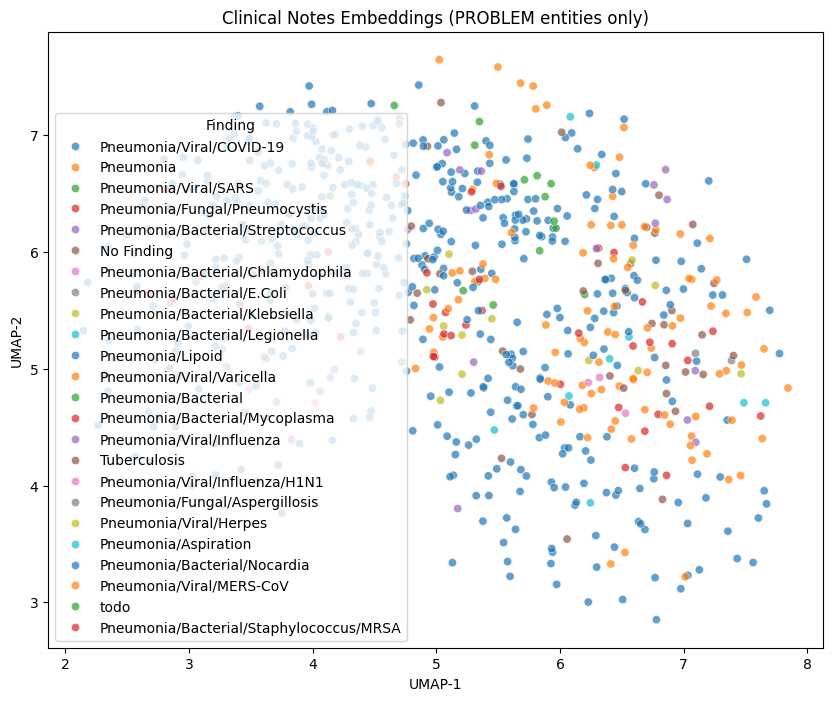

In [24]:
def extract_problem_entities(text):
    raw_entities = nlp_ner(text)
    merged_problems = []
    current_text = ""
    current_label = ""

    for ent in raw_entities:
        word = ent["word"]
        label = ent["entity"]

        if not label.endswith("PROBLEM"):
            continue  # skip if not a problem

        if word.startswith("##"):
            word = word[2:]
            current_text += word
        elif label.startswith("I-") and label[2:] == current_label:
            current_text += " " + word
        else:
            if current_text:
                merged_problems.append(current_text)
            current_text = word
            current_label = label[2:] if label.startswith("B-") else label

    if current_text:
        merged_problems.append(current_text)

    return " ".join(merged_problems)
df['problem_entities'] = df['clinical_notes'].apply(extract_problem_entities)
problem_embeddings = model.encode(df['problem_entities'].tolist(), show_progress_bar=True)
df['problem_embeddings'] = problem_embeddings.tolist()
from umap import UMAP

umap = UMAP(n_neighbors=15, n_components=2, metric='cosine')
embedding_2d = umap.fit_transform(problem_embeddings)

df['embedding_2d_x'] = embedding_2d[:, 0]
df['embedding_2d_y'] = embedding_2d[:, 1]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='embedding_2d_x',
    y='embedding_2d_y',
    hue='finding',
    palette='tab10',
    data=df,
    alpha=0.7
)
plt.title('Clinical Notes Embeddings (PROBLEM entities only)')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='Finding')
plt.show()
